***
<div class="alert alert-block alert-success">
<font color = '#006400'> 
    
# 1. Data Collection </font>    

Importing Libraries, reading Data and merging Datasets.
</div>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data
demographic = pd.read_excel(r"data/raw/Telco_customer_churn_demographics.xlsx")
location = pd.read_excel(r"data/raw/Telco_customer_churn_location.xlsx")
population = pd.read_excel(r"data/raw/Telco_customer_churn_population.xlsx")
services = pd.read_excel(r"data/raw/Telco_customer_churn_services.xlsx")
status = pd.read_excel(r"data/raw/Telco_customer_churn_status.xlsx")

In [3]:
# Display
pd.set_option('display.max_columns', None)

display(demographic.head(2))
display(location.head(2))
display(population.head(2))
display(services.head(2))
display(status.head(2))

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1


,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237


,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586


,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.0,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.0,0,390.8,1024.10


,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer


In [4]:
del services['Count']
del status['Count']

In [5]:
# Merge the tables on "Customer ID"

df = demographic.merge(location, on='Customer ID', how='outer') \
                       .merge(services, on='Customer ID', how='outer') \
                       .merge(status, on='Customer ID', how='outer')

# Merge df with population table

df = df.merge(population, on='Zip Code', how='left')

# Display the first 2 rows of the merged table
display(df.head(2))

,Customer ID,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter_y,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.0,59.65,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.0,0,390.8,1024.10,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,54,55668


In [6]:
# Set "Customer ID" as an index

df.set_index('Customer ID', inplace = True)

In [7]:
# Check for duplicates
if df.duplicated().any():
    display(df[df.duplicated(keep=False)])
else:
    print("No duplicates found")

No duplicates found


  
<div class="alert alert-block alert-success">
<a id='explore'>
<font color = '#006400'> 
    
# 2. Data Exploration </font>
</a>

Understand the structure of the data and provide the first impressions of patterns, relations and errors.
    
</div>

### 2.1. Basic info and statistics

In [8]:
# Drop repeated columns "Count" and "Quarter"
df = df.drop(columns=['Quarter_x'])
df = df.rename(columns={'Quarter_y': 'Quarter'})

In [9]:
# Checking df general info in a dataframe

def df_info(data): 
    '''
    Returns a dataframe of .info() method, instead of its usual design
    
    Args: 
        data (panda dataframe) - data to analyse
    Returns: 
        pandas dataframe'''
    
    dtype_info = pd.DataFrame(data.dtypes).T.rename(index={0:'Column type'})
    missing_val_info = pd.DataFrame(data.isna().sum()).T.rename(index={0:'Count for missing values'})
    missing_val_percent_info = pd.DataFrame(data.isna().sum() / len(data)*100).T.rename(index={0:'Missing values (in %)'})
    
    tab_info = pd.concat([dtype_info, missing_val_info, missing_val_percent_info], axis=0)
    tab_info = tab_info.T.join(data.describe().T).fillna('-')
    
    return tab_info


display(df_info(df).style)

# Display shape of df:
print(f'\nThe DataFrame has {df.shape[1]} features with data from {df.shape[0]} rows.')

,Column type,Count for missing values,Missing values (in %),count,mean,std,min,25%,50%,75%,max
Count_x,int64,0,0.000000,7043.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Gender,object,0,0.000000,-,-,-,-,-,-,-,-
Age,int64,0,0.000000,7043.000000,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Under 30,object,0,0.000000,-,-,-,-,-,-,-,-
Senior Citizen,object,0,0.000000,-,-,-,-,-,-,-,-
Married,object,0,0.000000,-,-,-,-,-,-,-,-
Dependents,object,0,0.000000,-,-,-,-,-,-,-,-
Number of Dependents,int64,0,0.000000,7043.000000,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Count_y,int64,0,0.000000,7043.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Country,object,0,0.000000,-,-,-,-,-,-,-,-



The DataFrame has 54 features with data from 7043 rows.


In [10]:
# For qualitative features
df.describe(include='O').T

,count,unique,top,freq
Gender,7043,2,Male,3555
Under 30,7043,2,No,5642
Senior Citizen,7043,2,No,5901
Married,7043,2,No,3641
Dependents,7043,2,No,5416
Country,7043,1,United States,7043
State,7043,1,California,7043
City,7043,1106,Los Angeles,293
Lat Long,7043,1679,"33.362575, -117.299644",43
Referred a Friend,7043,2,No,3821


__Notes:__

> - There are __7043 rows__ (Clients) and __50 features__ <p>
> - There are __19 quantitative variables__ and __31 qualitative__ <p>
> - __Missing values:__ Churn Category (5174) and Churn reason (5174)  <p>
> - __Constant variables:__ Country and State have the unique values "United States" and "California" respectively; Quarter is always Q3 <p>
> - City has 1106 different values. But California only has 482 cities <p>
> - __Check if categoric values are acceptable:__ Offer has 6 possible values; Contract has 3 possivlue values; Payment Method has 3 possible values; Customer Status has 3 possible values; Churn Category has 5 possible values; Churn Reason has 20<p>
> - For age information we have two dummy variables: Under 30 and Senior Citizen <p>
> - Check if when Dependents is Yes then Number of Dependents is higher than 0 <p>

### 2.2. Further exploration 

__Skewness and Kurtosis__

> - __Skewness:__ Degree of asymmetry. Between -0.5 and 0.5 then is approx symmetric; 0 is symetric; between -1 and -0.5 or 0.5 and 1 is moderately skewed. Less than -1 or greater than 1 is highly skewed. <p>
> - __Kurtosis:__ Degree of peakedness. High kurtosis (>3) indicate a peaked distribution which could indicate the presence of outliers. <p>


__Notes:__
> - __Highly skewed:__ Number of Dependents, Number of Referrals, Avg Monthly GB Download, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Churv Value
> - __High kurtosis:__ Total Refunds, Number of Dependents, Total Extra Data Charges

In [11]:
# Compute skewness and kurtosis on numeric variables only
num_cols = df.select_dtypes(include=np.number).columns
tab_info4 = pd.DataFrame(df[num_cols].skew(), columns=['Skewness'])
tab_info5 = pd.DataFrame(df[num_cols].kurtosis(), columns=['Kurtosis'])
tab_info2 = pd.concat([tab_info4,tab_info5])
tab_info2

,Skewness,Kurtosis
Count_x,0.000000,NaN
Age,0.162186,NaN
Number of Dependents,2.109932,NaN
Count_y,0.000000,NaN
Zip Code,-0.209615,NaN
Latitude,0.314804,NaN
Longitude,-0.091932,NaN
Number of Referrals,1.446060,NaN
Tenure in Months,0.240543,NaN
Avg Monthly Long Distance Charges,0.049176,NaN


__Categorical Variables - Check levels/possible values__ <p>

In [12]:
# Variable Offer
df['Offer'].value_counts()

Offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64

In [13]:
# Variable Contract
df['Contract'].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [14]:
# Variable Payment Method
df['Payment Method'].value_counts()

Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

In [15]:
# Variable Customer Status
df['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

> - Stayed: customers who continued with the service; <p>
> - Churned: customers who left the service; <p>
> - Joined: new customers who joined the service during the considered period

In [16]:
# Variable Churn Category
df['Churn Category'].value_counts()

Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

In [17]:
# Variable Churn Reason
df['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

### 2.3. Visual Exploration

<div class="alert alert-block alert-info">

Numerical Variables Distributions & Outliers Analysis
</div>

**Histograms**

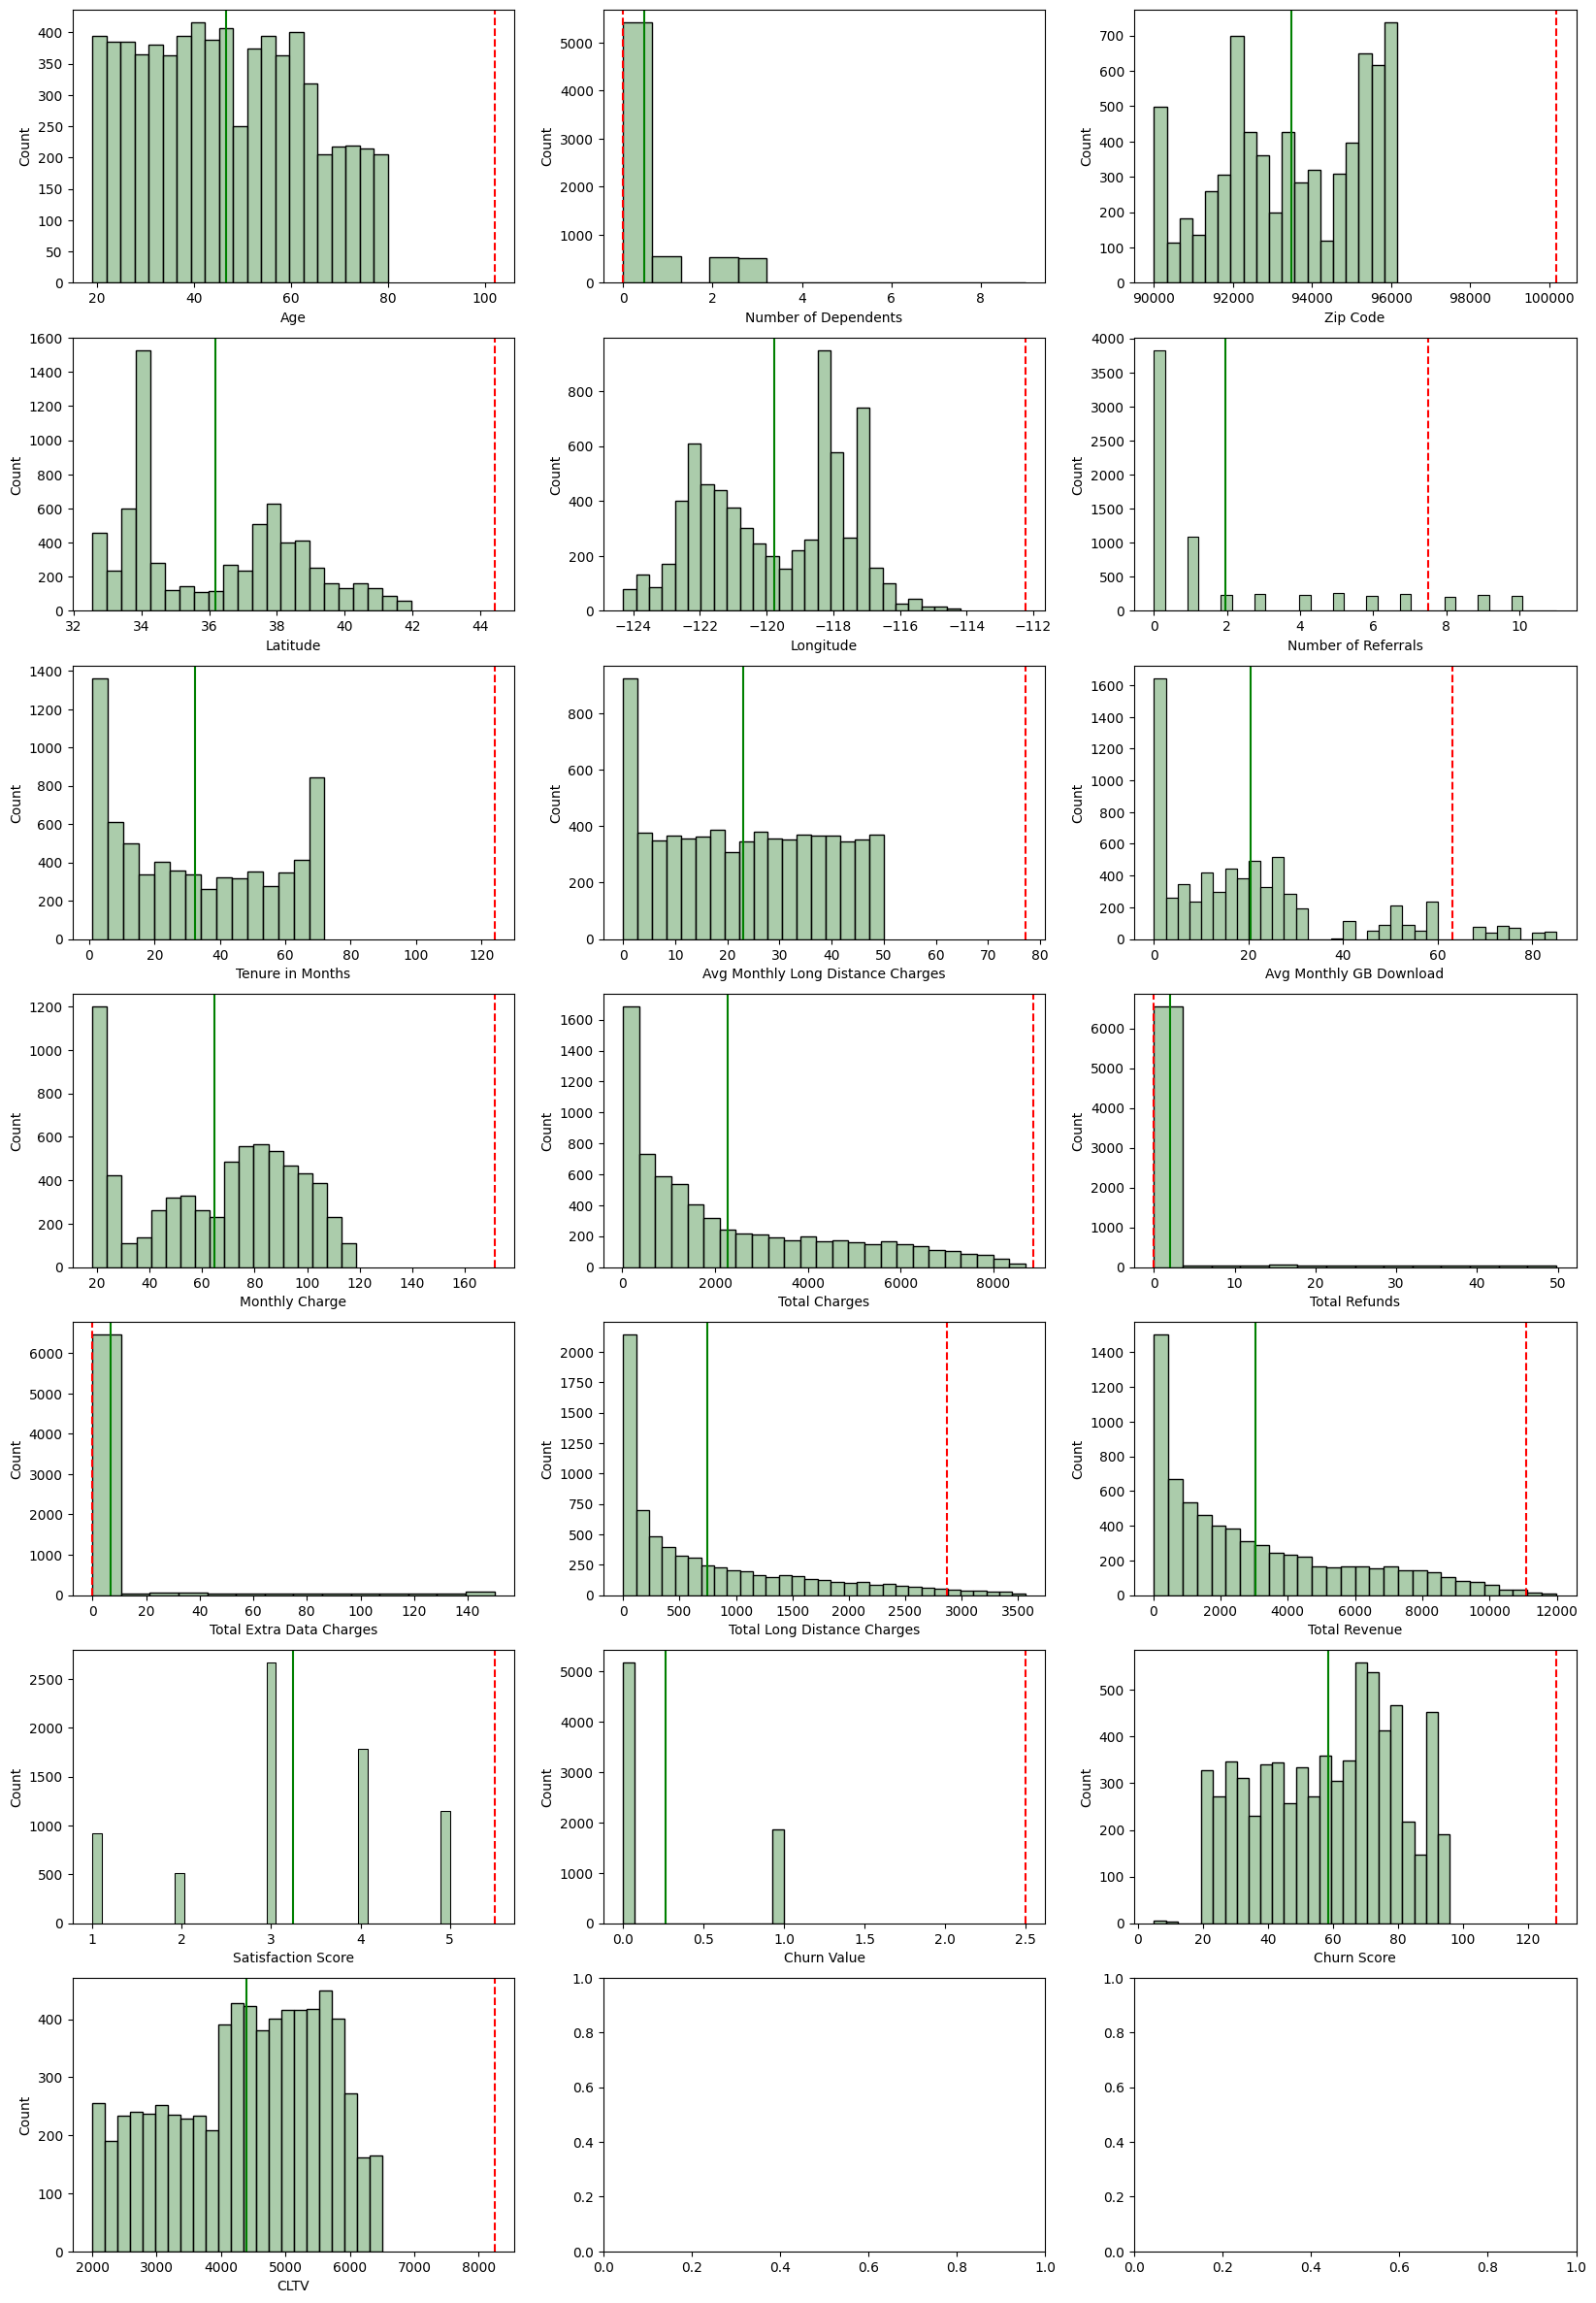

In [18]:
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))

# Define the columns to plot
columns_numerical = columns_numerical = ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']

for i, col in enumerate(columns_numerical):
    sns.histplot(ax=axs[i//3][i%3], data=df, x=col, color='darkseagreen')
    axs[i//3][i%3].set_xlabel(col)

    # Mark the mean and the Q3 + 1.5IQR representing red vertical lines for each subplot
    axs[i//3][i%3].axvline(df[col].mean(), color='green')
    axs[i//3][i%3].axvline(df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25)), color='red', linestyle='--')

plt.show()

**Boxplots**

In [19]:
# fig, ax = plt.subplots(4, 5, figsize=(18, 8))
# for i, var in enumerate(df[['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
# 'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
#  'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']]):

#     if i < 22:
#         subplot = ax.flatten()[i]
#         g = sns.boxplot(data=df,
#                         x=var,
#                         ax=subplot,
#                         color='darkseagreen')
#         subplot.set_title(var, fontsize=8, pad=1)
#         subplot.set_xlabel('')
# sns.despine()
# plt.subplots_adjust(hspace=0.5, wspace=0.3)
# fig.suptitle("Box plots of all numeric variables", fontsize=12)
# plt.show()

**Distribution graph**

In [20]:
# fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,15), constrained_layout=True)

# for ax, var in zip(axes.flatten(), df[['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
# 'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
#  'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']]):
#     sns.violinplot(x=var, data=df, ax=ax,color='darkseagreen')
#     ax.set_title(var)
#     ax.set_xlabel(var)

# # Adjust the layout and show the figure
# plt.subplots_adjust(left=None, bottom=None, right=None, top=0.935, wspace=None, hspace=0.4)
# plt.show()

**Outliers: IQR approach**
> * The IQR method states that values locating outside the interval **[Q1 - 1.5 * IQR, Q1 + 1.5 * IQR] are outliers**
> * Because the data is sensitive, only extreme values with IQR test will be considered for this test __by using a criterion of 3__
> * The 3(IQR) criterion tells us that any observation that falls outside the decision range is considered an extreme outlier 

In [21]:
# How many outliers are there for each  numerical variable

numerical_cols = df.select_dtypes(include=np.number).columns # Select numerical columns

q1 = df[numerical_cols].quantile(0.25)
q3 = df[numerical_cols].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_aligned, lower_bound_aligned = df.align(lower_bound, axis=1, copy=False) # Align DataFrame and Series before comparison
_, upper_bound_aligned = df.align(upper_bound, axis=1, copy=False)

outliers = (df_aligned < lower_bound_aligned).sum() + (df_aligned > upper_bound_aligned).sum() # Calculate the number of outliers for each variable

outliers_count = outliers[outliers > 0] # Filter and print only variables which have outliers

print(f'There are {len(outliers_count)} numerical variables with outliers (1.5*IQR):')
print(outliers_count.sort_values(ascending=False))

There are 9 numerical variables with outliers (1.5*IQR):
Number of Dependents           1627
Satisfaction Score              922
Total Extra Data Charges        728
Number of Referrals             676
Total Refunds                   525
Avg Monthly GB Download         362
Total Long Distance Charges     196
Population                       57
Total Revenue                    21
dtype: int64


In [22]:
# extreme outliers
extreme_outliers = (df_aligned < lower_bound_aligned - 3 * iqr).sum() + (df_aligned > upper_bound_aligned + 3 * iqr).sum() # Calculate the number of outliers for each variable

extreme_outliers_count = extreme_outliers[extreme_outliers > 0] # Filter and print only variables which have outliers

print(f'There are {len(extreme_outliers_count)} numerical variables with outliers (3*IQR):')
print(extreme_outliers_count.sort_values(ascending=False))

There are 3 numerical variables with outliers (3*IQR):
Number of Dependents        1627
Total Extra Data Charges     728
Total Refunds                525
dtype: int64


__Notes:__ 

> - Outliers (points outside the whiskers): <p>
> > -  Number of Referrals (part of the distribution) <p>
> > -  Avg Monthly GB Download (3 different distributions) <p>
> > -  Total Refunds, Total Extra Data Charges (weird distribution) <p>
> > -  Total Long Distance Charges, Total Revenue (distribution is highly skewed, outliers are part of it) <p>
> > -  Satisfaction Score (a few outliers of very low satisfaction) <p>

> - Variables 'Number of Dependents', 'Total Extra Data Charges', 'Total Refunds' show presence of **extreme outliers** (using 3*IQR criterion)   <p>



   

<div class="alert alert-block alert-info">

Numerical Variables - Correlations
    
</div>

__Spearman correlation between numerical variables:__ <p>
(data is not normally distributed)

In [23]:
# plt.figure(figsize=(9, 7))
# custcmap = sns.diverging_palette(100, 150, as_cmap=True) 
# corr = df[['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
# 'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
#  'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']].corr(method='spearman')
# mask = np.triu(np.ones_like(corr, dtype=bool))
# sns.heatmap(corr, annot=True, linewidths=0.5, cmap=custcmap, vmin=-1, vmax=1, mask=mask, annot_kws={"fontsize":7})
# plt.title('Spearman Correlation Matrix', fontsize=14, fontweight='bold')
# plt.show()

In [24]:
# Variables with correlation higher than 0.7
def corr_dict(df, threshold):
    df_corr = df.corr(method = 'spearman')
    corr_dict = {}
    for i in range(len(df_corr)):
        for j in range(i+1, len(df_corr)):
            if df_corr.iloc[i,j] >= threshold:
                if df_corr.columns[i] not in corr_dict:
                    corr_dict[df_corr.columns[i]] = [(df_corr.columns[j], df_corr.iloc[i,j])]
                else:
                    corr_dict[df_corr.columns[i]].append((df_corr.columns[j], df_corr.iloc[i,j]))
            elif df_corr.iloc[i,j] <= -threshold:
                if df_corr.columns[i] not in corr_dict:
                    corr_dict[df_corr.columns[i]] = [(df_corr.columns[j], df_corr.iloc[i,j])]
                else:
                    corr_dict[df_corr.columns[i]].append((df_corr.columns[j], df_corr.iloc[i,j]))
    return corr_dict

corr_dict(df[numerical_cols], 0.7)

{'Zip Code': [('Latitude', 0.8798232020426234),
  ('Longitude', -0.7415155022458879),
  ('ID', 1.0)],
 'Latitude': [('Longitude', -0.8695458835292985), ('ID', 0.8798232020426234)],
 'Longitude': [('ID', -0.7415155022458879)],
 'Tenure in Months': [('Total Charges', 0.8894757959233502),
  ('Total Revenue', 0.9126474143808789)],
 'Total Charges': [('Total Revenue', 0.9783658853799454)],
 'Total Long Distance Charges': [('Total Revenue', 0.7775012768341926)],
 'Satisfaction Score': [('Churn Value', -0.7172652074308468)]}

__Notes:__ 

High correlations (>0.7) exist for the following variables (except Zip Code, Latitude & Longitude):<p>
>- Tenure in Months:
>>    - Total Charges
>>    - Total Revenue

If tenure is high (customer has been with the company for more months), then the more he can be charged and hence total revenue is also higher

>- Total Charges:
>>    - Total Revenue<p>

Same logic. More charges -> more revenue generates

>- Total Long Distance Charges:
>>    - Total Revenue<p>

If long-distance charges are high, customers ahave additionally chagers above those specified in their plan, which directly results in an increase in total revenue 

>- Satisfaction Score:
>>    - Churn Value<p>

Customers less satisfied are more likely to churn. Negative correlation might be expected.

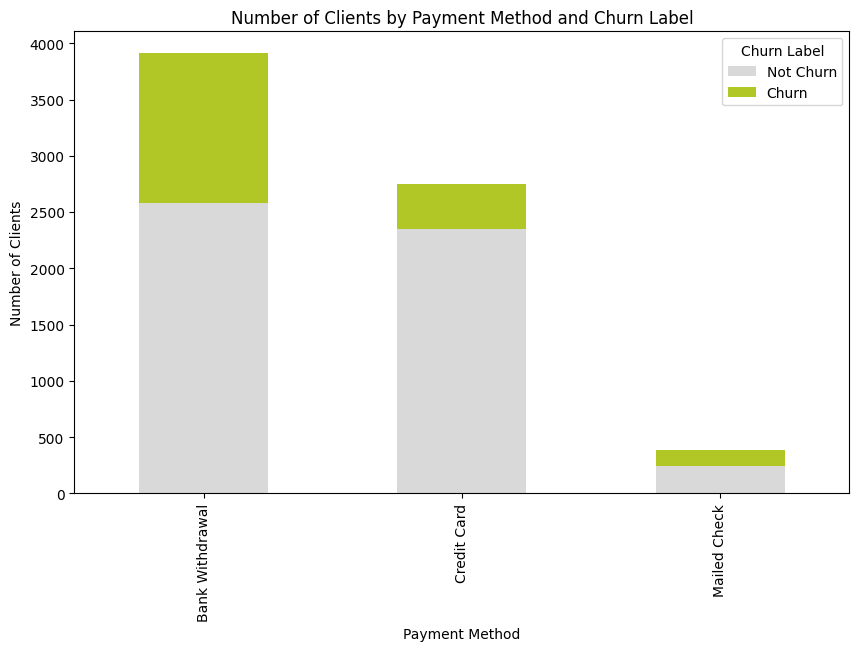

In [67]:
# Group by 'Payment Method' and 'Churn Label' and count the number of clients
payment_data = df.groupby(['Payment Method', 'Churn Label']).size().unstack()

# Plot the stacked bar chart
payment_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#D9D9D9', '#B0C726'])

# Set labels and title
plt.xlabel('Payment Method')
plt.ylabel('Number of Clients')
plt.title('Number of Clients by Payment Method and Churn Label')

# Customize legend labels and colors
legend_labels = ['Not Churn', 'Churn']
plt.legend(legend_labels, title='Churn Label', loc='upper right')

plt.savefig('outputs/Number of Clients by Payment Method and Churn Label.png', bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

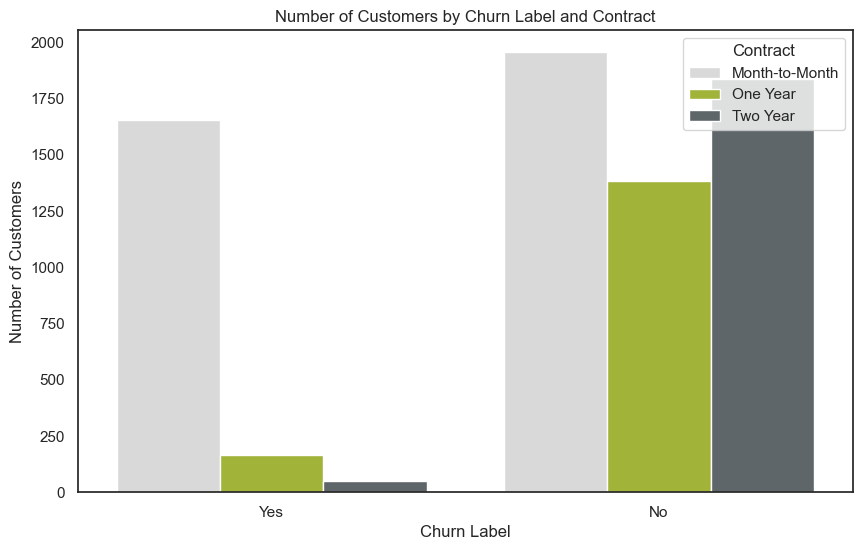

In [76]:
# Define the color palette
colors = {'Month-to-Month': '#D9D9D9', 'One Year': '#B0C726', 'Two Year': '#5C666C'}

# Set the style of the visualization
sns.set(style="white")

# Create a countplot with custom colors
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn Label', hue='Contract', data=df, palette=colors)

# Set labels and title
plt.xlabel('Churn Label')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Churn Label and Contract')

# Save the plot
plt.savefig('outputs/Number of Customers by Churn Label and Contract.png', bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

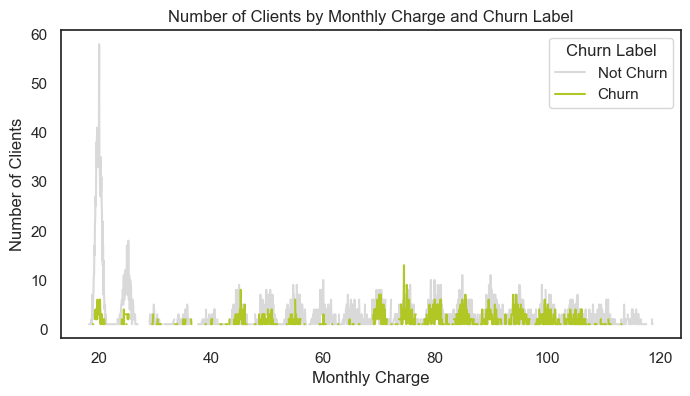

In [82]:


# Group by Monthly Charge and count the number of clients for each Churn Label
line_data = df.groupby(['Monthly Charge', 'Churn Label']).size().unstack()

# Plot the line graph with custom colors
line_data.plot(kind='line', figsize=(8, 4), color=['#D9D9D9', '#B0C726'])

# Set labels and title
plt.xlabel('Monthly Charge')
plt.ylabel('Number of Clients')
plt.title('Number of Clients by Monthly Charge and Churn Label')

# Customize legend labels and colors
legend_labels = ['Not Churn', 'Churn']
plt.legend(legend_labels, title='Churn Label', loc='upper right')

plt.savefig('outputs/Number of Clients by Monthly Charge and Churn Label.png', bbox_inches='tight', transparent=True)
# Show the plot
plt.show()


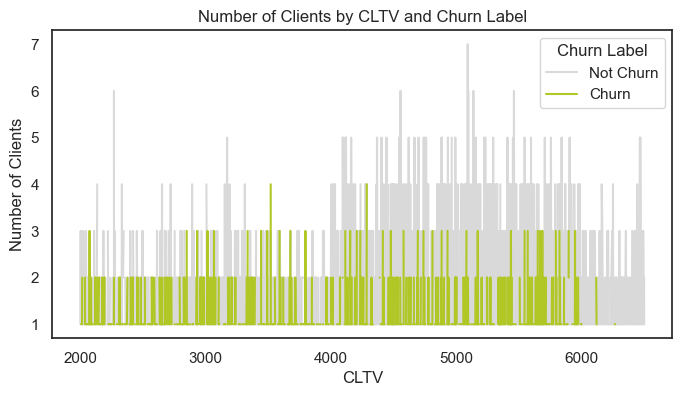

In [86]:


# Group by Monthly Charge and count the number of clients for each Churn Label
line_data = df.groupby(['CLTV', 'Churn Label']).size().unstack()

# Plot the line graph with custom colors
line_data.plot(kind='line', figsize=(8, 4), color=['#D9D9D9', '#B0C726'])

# Set labels and title
plt.xlabel('CLTV')
plt.ylabel('Number of Clients')
plt.title('Number of Clients by CLTV and Churn Label')

# Customize legend labels and colors
legend_labels = ['Not Churn', 'Churn']
plt.legend(legend_labels, title='Churn Label', loc='upper right')

#plt.savefig('outputs/Number of Clients by Monthly Charge and Churn Label.png', bbox_inches='tight', transparent=True)
# Show the plot
plt.show()


<div class="alert alert-block alert-info">

Categorical Variables
    
</div>

In [25]:
# categorical_data = ['Offer', 'Internet Type', 'Contract', 'Payment Method','Customer Status', 'Churn Category']


# # Count plots for non-numerical variables
# fig, ax = plt.subplots(2, 3, figsize=(18, 6))
# for var, subplot in zip(categorical_data, ax.flatten()):
#     sns.countplot(data=df, x=var, ax=subplot, color='darkseagreen')
#     subplot.set_xlabel(var.replace('_', ' '), fontsize=16, fontweight='bold')
#     subplot.tick_params(axis='x', labelsize=5)

# # Decoration
# sns.despine()
# fig.suptitle("Count Plots for Non-metric Variables", fontsize=14)
# plt.show()

### 2.4. In-depth Exploration

#### 2.4.1  Churn Analysis Insights

##### Demographic Factors:

- **Gender**: Gender does not seem to significantly influence churn. Both males and females have comparable churn rates:
  - Female: 26.92%
  - Male: 26.16%

- **Age**: Customers under 30 years of age have a lower churn rate compared to those 30 and above:
  - Under 30: 21.70%
  - 30 and above: 27.74%

- **Marital Status**: Married customers have a noticeably lower churn rate:
  - Married: 19.66%
  - Not Married: 32.96%

- **Senior Citizen Status**: Senior citizens churn at a higher rate than non-senior citizens:
  - Senior Citizen: 41.68%
  - Not a Senior Citizen: 23.61%

- **Dependents**: Having dependents seems to have a strong influence on reducing churn:
  - With Dependents: 6.52%
  - Without Dependents: 32.55%

- **Referral**: Customers who were referred by a friend tend to churn less:
  - Referred: 19.37%
  - Not Referred: 32.58%

##### Service Factors:

- **Offers**: Among all the offers, Offer E stands out with the highest churn rate:
  - Offer E: 52.92%

- **Internet Service**: Having internet service is associated with a higher churn rate:
  - With Internet Service: 31.83%
  - Without Internet Service: 7.40%

- **Internet Type**: Among all internet types, Fiber Optic users show the highest churn:
  - Fiber Optic: 40.72%

- **Contract Duration**: Short-term contracts (month-to-month) have a significantly higher churn rate:
  - Month-to-Month: 45.84%

##### Payment Factors:

- **Payment Method**: Customers paying through mailed checks have the highest churn rate:
  - Mailed Check: 36.88%



In [26]:
df

,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,54,55668
1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,56,47534
4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,100,27778
4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges,114,26265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,1,Female,30,No,No,No,No,0,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,Q3,5,Stayed,No,0,45,5306,NaN,NaN,431,2182
6840-RESVB,1,Male,38,No,No,Yes,Yes,2,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,Q3,3,Stayed,No,0,59,2140,NaN,NaN,432,18980
2234-XADUH,1,Female,30,No,No,Yes,Yes,2,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,Q3,4,Stayed,No,0,71,5560,NaN,NaN,433,42


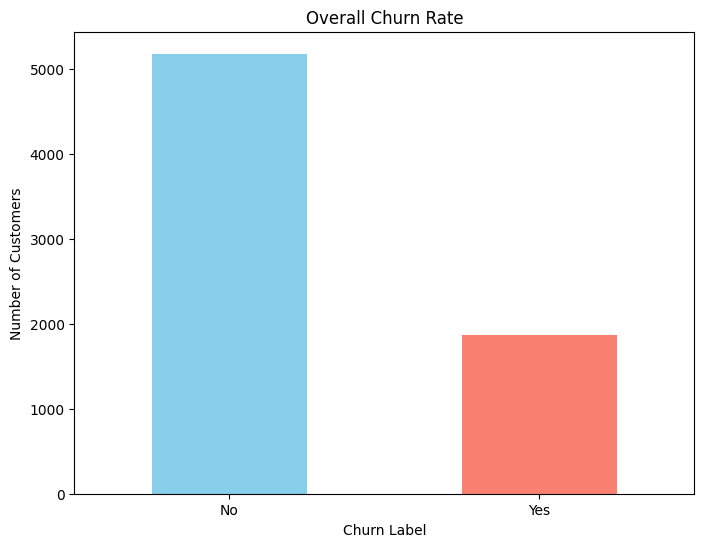

Overall churn rate: 26.54%
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


In [27]:
# Visualizing the overall churn rate
churn_counts = df['Churn Label'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Overall Churn Rate')
plt.xlabel('Churn Label')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

print(f'Overall churn rate: {round(churn_counts[1]/(churn_counts[0]+churn_counts[1])*100, 2)}%')
# print the values of yes and no
print(churn_counts)

In [28]:
# # Identify the top 5 cities by customer count
# top5_cities = df['City'].value_counts().index[:5].tolist()

# def plot_churn_by_multiple_features_annotated(features, titles):
#     # Determine the number of rows required based on the number of features
#     num_features = len(features)
#     num_rows = -(-num_features // 3)  # Ceiling division
    
#     # Create a grid of subplots
#     fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    
#     # If there's only one row, axes is a 1D array, so we reshape it for consistency
#     if num_rows == 1:
#         axes = axes.reshape(1, -1)
    
#     # Loop over features and their corresponding titles to plot
#     for idx, (feature, title) in enumerate(zip(features, titles)):
#         row, col = divmod(idx, 3)
        
#         # Filter data based on feature specifics
#         data_subset = df
#         if feature == 'City':
#             data_subset = df[df['City'].isin(top5_cities)]
        
#         churn_by_feature = data_subset.groupby(feature)['Churn Label'].value_counts(normalize=True).unstack()
#         ax = churn_by_feature.plot(kind='bar', stacked=True, ax=axes[row, col], color=['skyblue', 'salmon'])
#         axes[row, col].set_title(title)
#         axes[row, col].set_ylabel('Proportion of Customers')
#         axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=0)
#         axes[row, col].legend(title='Churn Label')

#         # Annotate the bars with their respective values
#         for p in ax.patches:
#             width, height = p.get_width(), p.get_height()
#             x, y = p.get_xy() 
#             ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')
    
#     # Remove any unused subplots
#     for idx in range(num_features, num_rows * 3):
#         row, col = divmod(idx, 3)
#         fig.delaxes(axes[row, col])
    
#     plt.tight_layout()
#     plt.show()


# # Identify all categorical features excluding "Customer ID" and "Churn Label"
# categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# # Remove unwanted features and adjust the list of features and titles
# excluded_features = ['Churn Label', 'Lat Long', 'Customer Status', 'Churn Category', 'Churn Reason', 'Country', 'Quarter', 'State']
# features_to_plot = [feature for feature in categorical_features if feature not in excluded_features]
# titles_to_plot = [f'Churn Rate by {feature}' for feature in features_to_plot]

# plot_churn_by_multiple_features_annotated(features_to_plot, titles_to_plot)

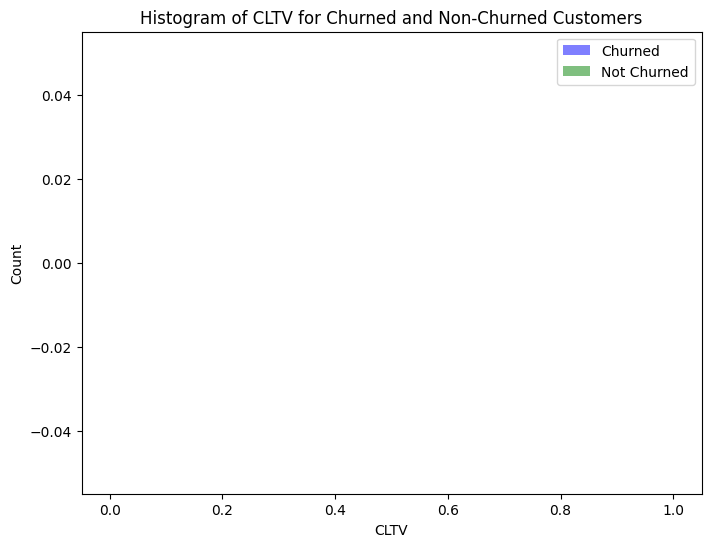

In [29]:
# Separate the data into churned and not churned customers
churned_data = df[df['Churn Label'] == 1]
not_churned_data = df[df['Churn Label'] == 0]

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a histogram for churned customers (in red)
plt.hist(churned_data['CLTV'], bins=15, alpha=0.5, color='blue', label='Churned')

# Create a histogram for non-churned customers (in blue)
plt.hist(not_churned_data['CLTV'], bins=15, alpha=0.5, color='green', label='Not Churned')

plt.title("Histogram of CLTV for Churned and Non-Churned Customers")
plt.xlabel("CLTV")
plt.ylabel("Count")
plt.legend()
plt.show()

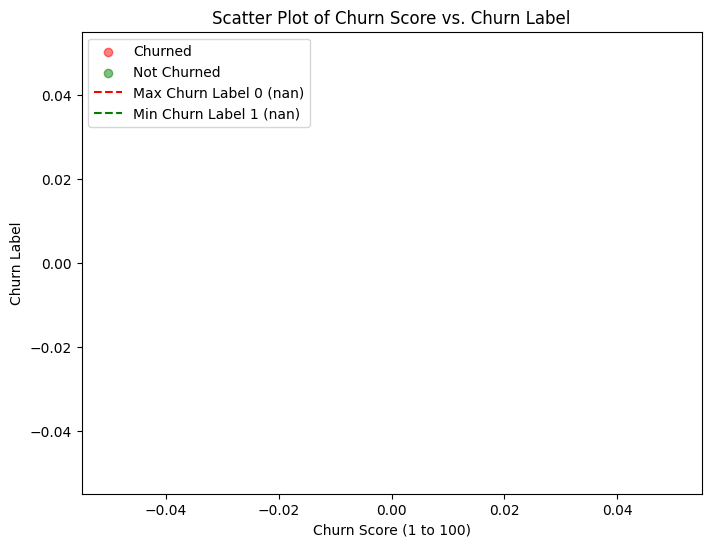

In [30]:
churned = df[df['Churn Label'] == 1]
not_churned = df[df['Churn Label'] == 0]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(churned['Churn Score'], churned['Churn Label'], label='Churned', alpha=0.5, color='red')
plt.scatter(not_churned['Churn Score'], not_churned['Churn Label'], label='Not Churned', alpha=0.5, color='green')

# Add lines for max of Churn Label 0 and min of Churn Label 1
max_0 = df[df['Churn Label'] == 0]['Churn Score'].max()
min_1 = df[df['Churn Label'] == 1]['Churn Score'].min()
plt.axvline(max_0, color='red', linestyle='--', label=f'Max Churn Label 0 ({max_0:.2f})')
plt.axvline(min_1, color='green', linestyle='--', label=f'Min Churn Label 1 ({min_1:.2f})')

plt.title("Scatter Plot of Churn Score vs. Churn Label")
plt.xlabel("Churn Score (1 to 100)")
plt.ylabel("Churn Label")

# Move the legend to the top left
plt.legend(loc='upper left')

plt.show()

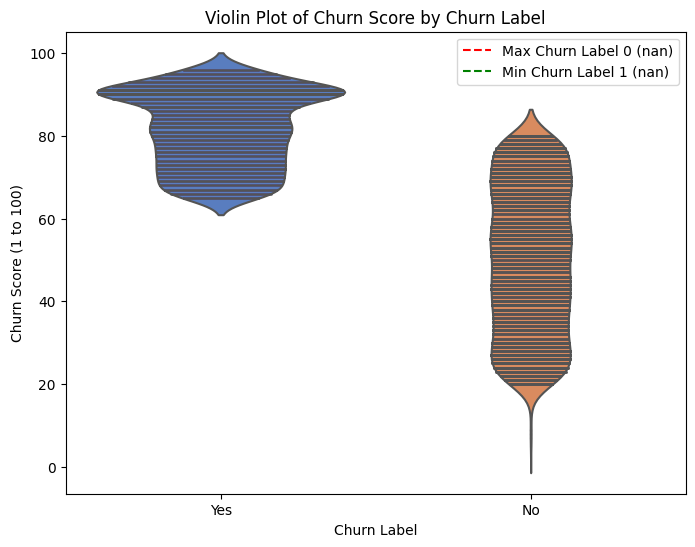

In [31]:
plt.figure(figsize=(8, 6))

# Create a violin plot with legend=False to address the warning
sns.violinplot(x='Churn Label', y='Churn Score', data=df, inner='stick', palette='muted', legend=False)

# Add lines for max of Churn Label 0 and min of Churn Label 1
max_0 = df[df['Churn Label'] == 0]['Churn Score'].max()
min_1 = df[df['Churn Label'] == 1]['Churn Score'].min()
plt.axhline(max_0, color='red', linestyle='--', label=f'Max Churn Label 0 ({max_0:.2f})')
plt.axhline(min_1, color='green', linestyle='--', label=f'Min Churn Label 1 ({min_1:.2f})')

plt.title("Violin Plot of Churn Score by Churn Label")
plt.xlabel("Churn Label")
plt.ylabel("Churn Score (1 to 100)")
plt.legend()
plt.show()


In [32]:
df.head(5)

,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,54,55668
1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,56,47534
4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,100,27778
4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges,114,26265


#### 2.4.2.  Who Are Our Customers?

##### Demographic Insights:

- **Gender**: The distribution of customers based on gender is almost even:
  - Female: 49.52%
  - Male: 50.48%

- **Age Group**: A majority of the customers are above the age of 30:
  - Under 30: 19.89%
  - 30 and above: 80.11%

- **Marital Status**: The number of married and unmarried customers is fairly balanced:
  - Married: 48.30%
  - Not Married: 51.70%

- **Senior Citizen Status**: A significant majority of customers are not senior citizens:
  - Senior Citizen: 16.21%
  - Not a Senior Citizen: 83.79%

- **Dependents**: Many customers do not have dependents:
  - With Dependents: 23.10%
  - Without Dependents: 76.90%

##### City Insights:

The top 5 cities by customer count are:
1. Los Angeles
2. San Diego
3. San Jose
4. Sacramento
5. San Francisco

These cities constitute a substantial proportion of the customer base, with Los Angeles having the highest number of customers.

In [33]:
"""Plot Functions"""
def plot_demographics(features, titles):
    num_features = len(features)
    num_rows = -(-num_features // 3)  # Ceiling division
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Loop over features and their corresponding titles to plot
    for idx, (feature, title) in enumerate(zip(features, titles)):
        row, col = divmod(idx, 3)
        sns.countplot(data=df, x=feature, ax=axes[row, col], palette="pastel")
        axes[row, col].set_title(title)
        axes[row, col].set_ylabel('Number of Customers')
        axes[row, col].set_xlabel('')
    
    # Remove any unused subplots
    for idx in range(num_features, num_rows * 3):
        row, col = divmod(idx, 3)
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()


def plot_location(features, titles):
    num_features = len(features)
    num_rows = -(-num_features // 3)  # Ceiling division
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Loop over features and their corresponding titles to plot
    for idx, (feature, title) in enumerate(zip(features, titles)):
        row, col = divmod(idx, 3)
        
        if feature == 'City':
            # If there are too many cities, we'll show only the top 10 for clarity
            top_cities = df['City'].value_counts().index[:10]
            data_subset = df[df['City'].isin(top_cities)]
            sns.countplot(data=data_subset, x=feature, ax=axes[row, col], palette="pastel", order=top_cities)
        else:
            order = df[feature].value_counts().index  # order bars by value count
            sns.countplot(data=df, x=feature, ax=axes[row, col], palette="pastel", order=order)
            
        axes[row, col].set_title(title)
        axes[row, col].set_ylabel('Number of Customers')
        axes[row, col].set_xlabel('')
        if feature == 'City':
            axes[row, col].set_xticklabels(top_cities, rotation=45)
    
    # Remove any unused subplots
    for idx in range(num_features, num_rows * 3):
        row, col = divmod(idx, 3)
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()


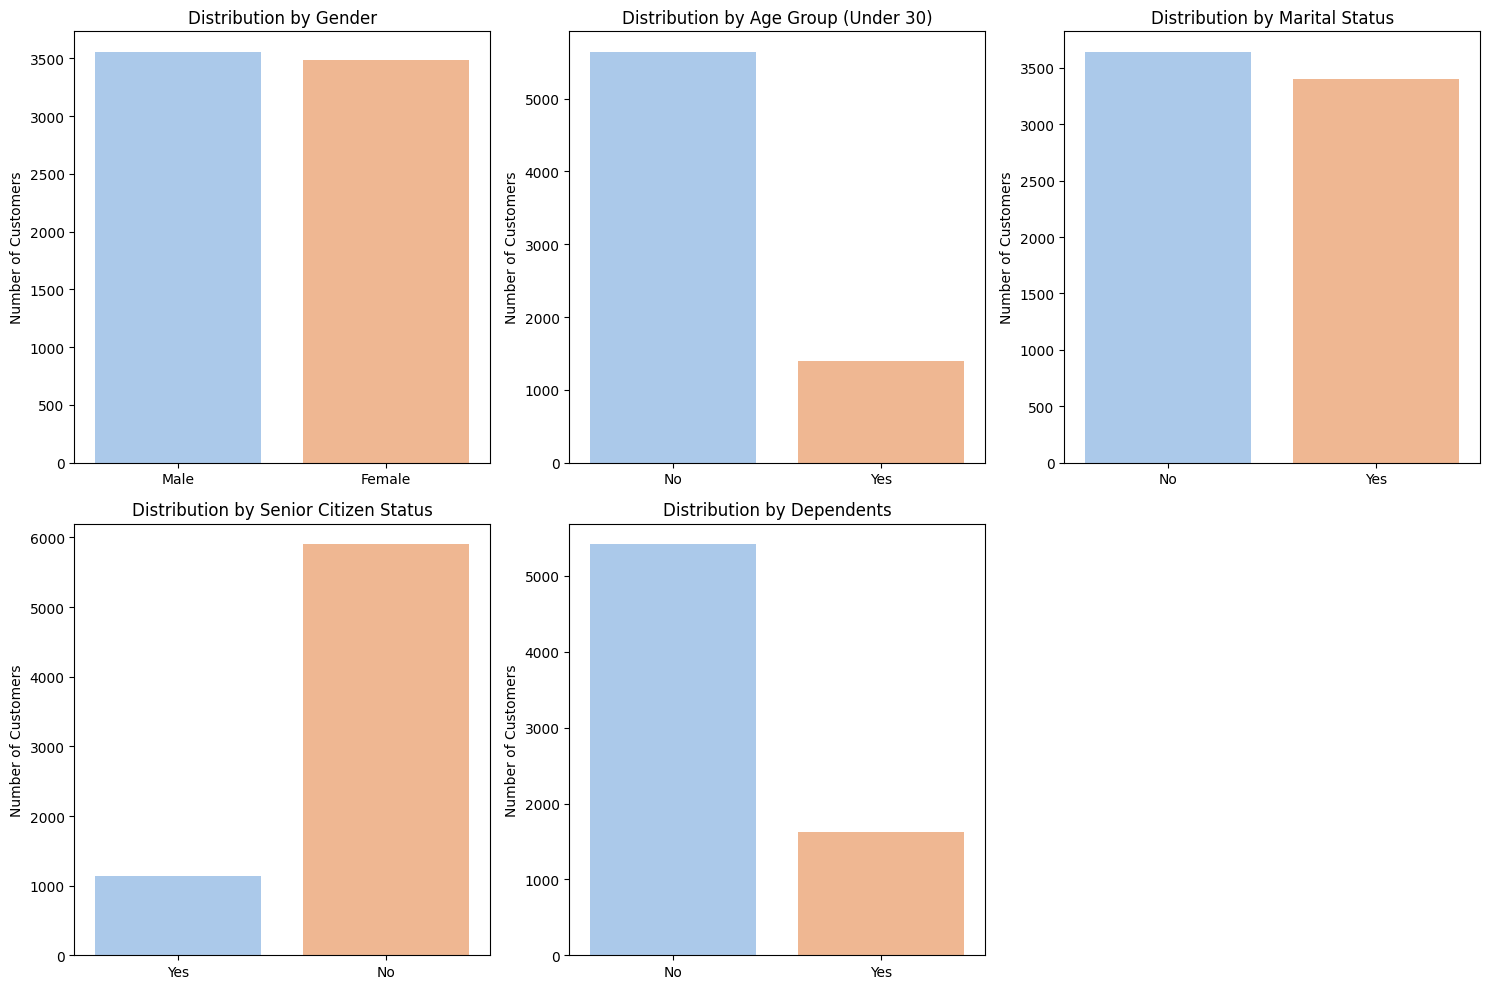

In [34]:
# Demographic features and their titles
demographic_features = ['Gender', 'Under 30', 'Married', 'Senior Citizen', 'Dependents']
demographic_titles = ['Distribution by Gender', 'Distribution by Age Group (Under 30)', 
                      'Distribution by Marital Status', 'Distribution by Senior Citizen Status', 
                      'Distribution by Dependents']

plot_demographics(demographic_features, demographic_titles)

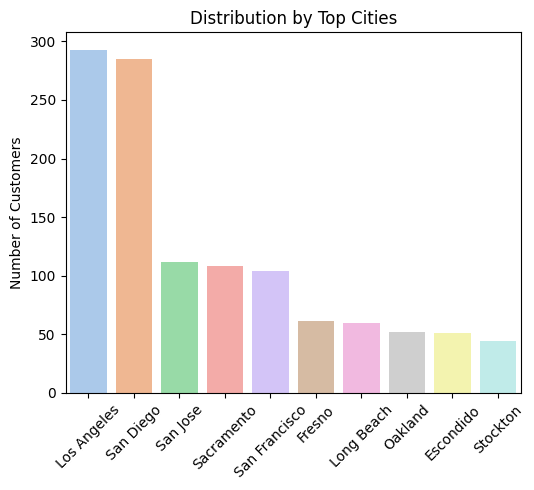

In [35]:
location_features = ['City']
location_titles = ['Distribution by Top Cities']
                   
# Let's test the updated functions by plotting the demographics and location distributions
plot_location(location_features, location_titles)

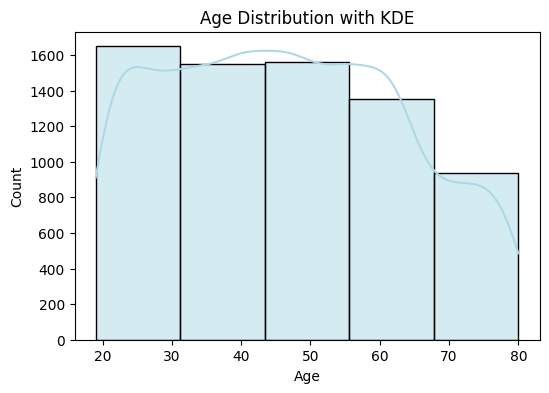

In [36]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=5, kde=True, color='lightblue', edgecolor='black')
plt.title("Age Distribution with KDE")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [37]:
df.head(5)

,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,54,55668
1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,56,47534
4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,100,27778
4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges,114,26265


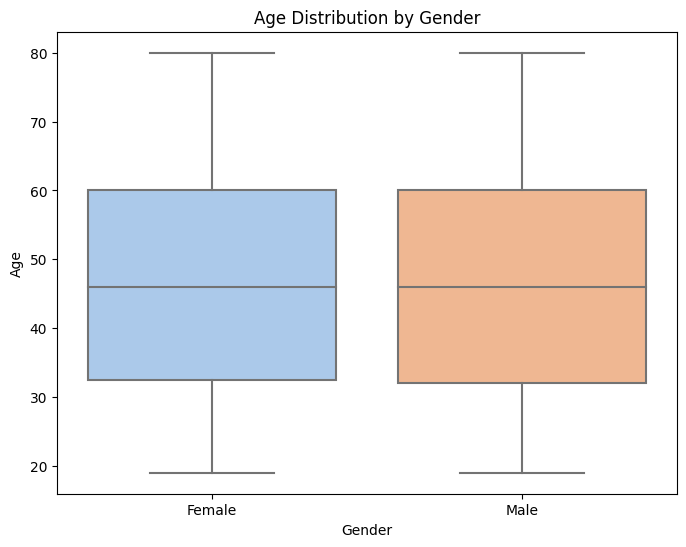

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df, palette='pastel')
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


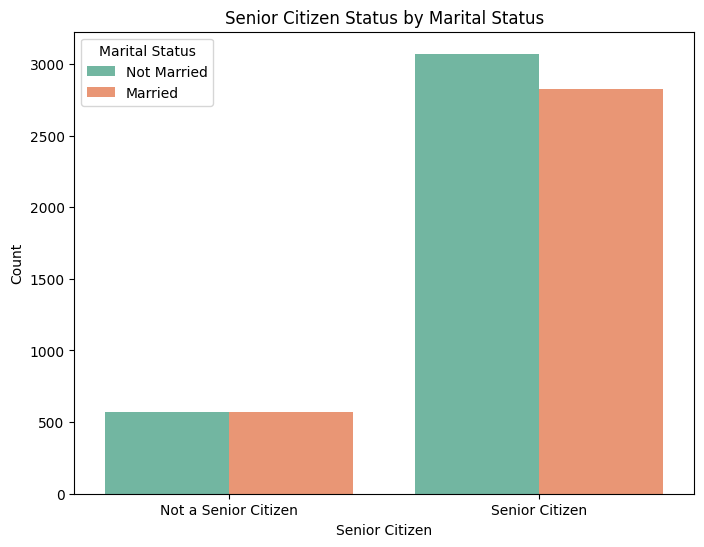

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Senior Citizen', hue='Married', data=df, palette='Set2')
plt.title("Senior Citizen Status by Marital Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not a Senior Citizen', 'Senior Citizen'])
plt.legend(title="Marital Status", labels=['Not Married', 'Married'])
plt.show()


In [40]:
# # Separate the data into churned and not churned customers
# churned = df[df['Churn Label'] == 1]
# not_churned = df[df['Churn Label'] == 0]

# # Create a scatter plot with two different colors for churned and not churned customers
# plt.figure(figsize=(8, 6))
# plt.scatter(not_churned['Total Revenue'], not_churned['Monthly Charge'], label='Not Churned', alpha=0.5, color='blue')
# plt.scatter(churned['Total Revenue'], churned['Monthly Charge'], label='Churned', alpha=0.5, color='red')

# plt.title("Scatter Plot of Churn Score vs. Monthly Charge with Churn Label")
# plt.xlabel("Total Revenue")
# plt.ylabel("Monthly Charge")
# plt.legend()
# plt.grid(True)
# plt.show()

In [41]:
# import folium

# # Filter the data to include only points within California's boundaries
# california_data = df[(df['Latitude'] >= 32.5) & (df['Latitude'] <= 42) &
#                       (df['Longitude'] >= -124.5) & (df['Longitude'] <= -114.1)]

# # Create a base map centered on California
# m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# # Iterate through the filtered data and add markers for each data point
# for index, row in california_data.iterrows():
#     lat, lon, revenue = row['Latitude'], row['Longitude'], row['Total Revenue']

#     # Determine marker color and label based on revenue
#     color = 'green' if revenue >= 5000 else 'lightblue'  # Specify a lighter shade of blue
#     label = 'Revenue >= $5000' if revenue >= 5000 else 'Revenue < $5000'

#     folium.CircleMarker(
#         location=[lat, lon],
#         radius=5,  # Adjust the radius as needed
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.6,
#         tooltip=f"Total Revenue: ${revenue:.2f}",
#     ).add_to(m)

# # Create a legend with custom colors and labels
# legend_html = """
# <div style="position: fixed; 
#      bottom: 50px; left: 50px; width: 200px; height: 90px; 
#      background-color: white; border: 2px solid grey; z-index: 9999; font-size: 14px;">
#      <i class="fa fa-circle fa-2x" style="color: green"></i> &ensp; Revenue >= $5000 <br>
#      <i class="fa fa-circle fa-2x" style="color: lightblue"></i> &ensp; Revenue < $5000
# </div>
# """
# m.get_root().html.add_child(folium.Element(legend_html))

# # Save the map to an HTML file
# m.save("california_revenue_map.html")

# # Display the map
# m


In [42]:
# import folium
# from folium.plugins import HeatMap

# # Filter the data to include only points within California's boundaries
# california_data = df[(df['Latitude'] >= 32.5) & (df['Latitude'] <= 42) &
#                       (df['Longitude'] >= -124.5) & (df['Longitude'] <= -114.1)]

# # Create a base map centered on California
# m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)  # Adjust the coordinates and zoom level

# # Create a list of data points for the heatmap
# heat_data = [[row['Latitude'], row['Longitude']] for index, row in california_data.iterrows()]

# # Create a HeatMap layer for California
# HeatMap(heat_data, radius=15).add_to(m)  # Adjust the radius as needed

# # Save the map to an HTML file
# m.save("california_heatmap.html")

# # Display the map
# m


#### 2.4.3. Service offering & Revenue analysis

Which services are bought together? Bundling offering. <p>
Revenues & Charges Analysis: <p>

- Total Revenue = Total Charges - Total Refunds + Total Extra Data Charges + Total Long Distance Charges 

##### Bundling offering


In [43]:
# from mlxtend.frequent_patterns import apriori, association_rules

# # Filter the dataframe to include only the services of interest
# services_of_interest = [
#     'Phone Service', 'Internet Service', 'Online Security', 'Online Backup', 
#     'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
#     'Streaming Movies', 'Streaming Music', 'Unlimited Data'
# ]
# df_services_subset = df[services_of_interest]

# # Convert the dataframe to a format suitable for Apriori
# df_services_apriori = df_services_subset.applymap(lambda x: 1 if x == 'Yes' else 0)

# # Generate frequent itemsets
# frequent_itemsets = apriori(df_services_apriori, min_support=0.05, use_colnames=True)

# # Generate association rules
# rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# # Filter rules to show only significant relationships (lift > 1 and confidence > 0.5)
# bundling = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)].sort_values(by='lift', ascending=False)

In [44]:
# bundling[bundling["confidence"]>0.7].sort_values(by='confidence', ascending=False).head(10)

In [45]:
# bundling.to_excel('significant_rules.xlsx', index=False)

#### 2.4.4. Churn score

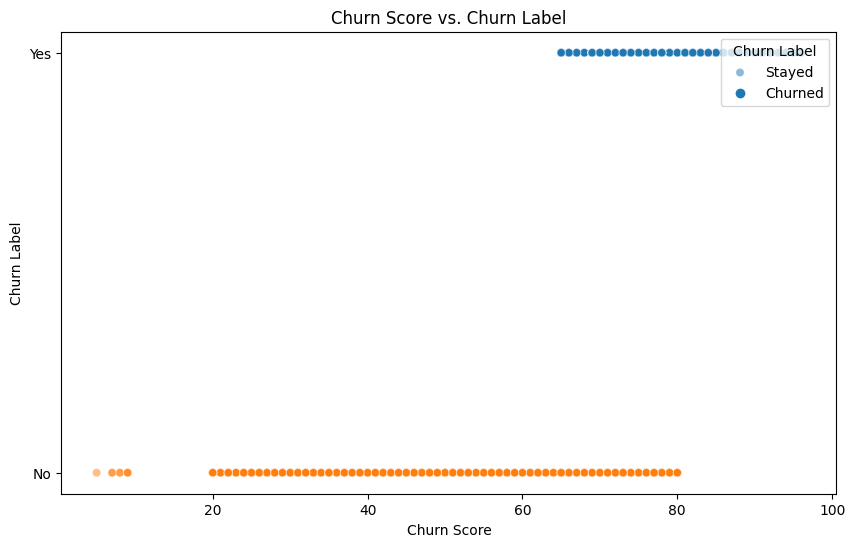

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Churn Score', y='Churn Label', hue='Churn Label', data=df, alpha=0.5)
plt.xlabel('Churn Score')
plt.ylabel('Churn Label')
plt.title('Churn Score vs. Churn Label')
plt.legend(title='Churn Label', loc='upper right', labels=['Stayed', 'Churned'])
plt.show()


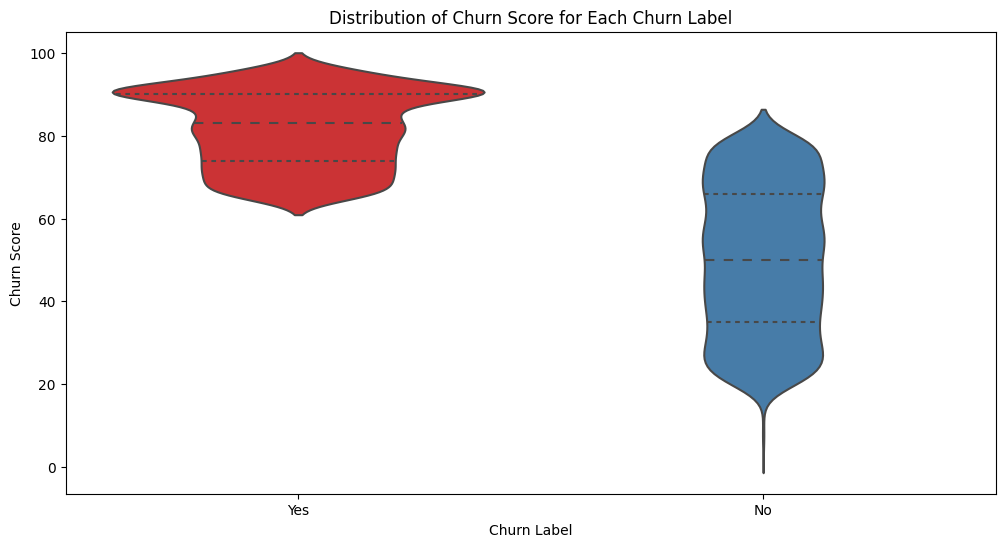

In [47]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Churn Label', y='Churn Score', data=df, palette="Set1", inner="quartile")
plt.xlabel('Churn Label')
plt.ylabel('Churn Score')
plt.title('Distribution of Churn Score for Each Churn Label')
plt.show()


<div class="alert alert-block alert-success">
<font color = '#006400'> 
    
# 3. Data Pre Processing </font>
</a>
    
</div>

### 3.1. Misclassifications

In [48]:
# There are no misclassifications detected

### 3.2. Variables Creation (To brainstorm)

> 1 - __Tenure Category__ - Derived from 'Tenure in Months' into groups like '0-6months', '7-12 months', etc. to help identify if newer customers are churning more than older ones <p>
> 2 - __Engagement Score__ - Create a score based on the number of services a customer has subscribed to. The more services, the higher the engagement score. <p>
> 3 - __Population Density__ - Segment zip codes into 'High', 'Medium', 'Low' based on population to help analyse if customers from densely populated areas behave differently<p>

Rates/constants:
> 4 - __Offer Acceptance Rate__ - Number of customers who accepted an offer divided by total customers (constant) <p>
> 5 - __Referral Rate__ - Number of successful referrals divided by number of referrals made <p>

Others: <p>
- bill shock to flag difference between two consecutive months' bills to see if there are big jumps<p>
- utilization rate = avg monthly gb downlod / limit set in their plan<p>

In [49]:
# 1 - Create Tenure Category variable based on this variable distribution
'''
- 0 - This quarter (joined) - 1-3 months
- 1 - > 3 months - 18 months (1 ano e meio)
- 2 - > 18 months - 36 months (1.5 - 3 anos)
- 3 - > 36 months - 54 months (3 anos - 4.5 anos)
- 4 - > 54 months - 72 months (4.5 anos - 6 anos)'''

df_preprocessed = df.copy()
bins = [0, 3, 18, 36, 54, 73]
df_preprocessed['Tenure Category'] = pd.cut(df_preprocessed['Tenure in Months'], bins=bins, labels=False, right=False)
df_preprocessed.insert(df_preprocessed.columns.get_loc('Tenure in Months') + 1, 'Tenure Category', df_preprocessed.pop('Tenure Category'))

In [50]:
# 2 - Create Engagement Score
'''
It adds +1 if the customer subscribes to each of the following services (have an associated fee):
- Phone Service
- Multiple Lines
- Internet Service
- Online Security
- Online Backup
- Device Protection Plan
- Premium Tech Support
- Unlimited Data'''

# List of services to count
services_to_count = [
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support', 'Unlimited Data']

# Define a function to calculate the Engagement Score based on services subscribed to
def calculate_engagement_score(row):
    score = sum(1 for service in services_to_count if row[service] == 'Yes')
    return score

# Apply the function to create the 'Engagement Score' column
df_preprocessed['Engagement Score'] = df_preprocessed.apply(calculate_engagement_score, axis=1)

In [51]:
# 3 - Create Population Density based on Zip Codes and Population

'''High Density: Above the 66th percentile
Medium Density: Between the 33rd and 66th percentile
Low Density: Below the 33rd percentile'''

# Calculate quantiles
low_threshold = df['Population'].quantile(0.33)
high_threshold = df['Population'].quantile(0.66)

# Segment into density categories
df_preprocessed['Density'] = 'Low'
df_preprocessed.loc[df['Population'] > low_threshold, 'Density'] = 'Medium'
df_preprocessed.loc[df['Population'] > high_threshold, 'Density'] = 'High'

df


,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,54,55668
1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,56,47534
4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,100,27778
4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges,114,26265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,1,Female,30,No,No,No,No,0,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,Q3,5,Stayed,No,0,45,5306,NaN,NaN,431,2182
6840-RESVB,1,Male,38,No,No,Yes,Yes,2,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,Q3,3,Stayed,No,0,59,2140,NaN,NaN,432,18980
2234-XADUH,1,Female,30,No,No,Yes,Yes,2,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,Q3,4,Stayed,No,0,71,5560,NaN,NaN,433,42


### 3.3. Encoding categorical variables

> Ordinal encoding (ranking preserving ordinal relationship) and create dummy variables (variables  without a natural order or ranking among their categories) <p>


Dummy variables:

- Customer Status -> New Customer - 1 if "Joined", 0 otherwise
- All columns with Yes and No

Ordinal encoding:

- Contract:<p>
    -"month-to-month" could be encoded as 1.<p>
    -"one year" could be encoded as 2.<p>
    -"two year" could be encoded as 3.<p>

Dummy but first separate in different columns:
- Offer
- Internet Type
- Churn Category
- Gender
- Payment Method
- Density

In [52]:
# Dummy variables

columns_to_dummify = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
                      'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                      'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                      'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Churn Label', 'Contract']

df_preprocessed[columns_to_dummify] = df_preprocessed[columns_to_dummify].replace({'Yes': 1, 'No': 0})


# Customer Status variable - replace "Joined" with 1 and all other values with 0 in the "Customer Status" column and this column will be called New Customer 
df_preprocessed.rename(columns={'Customer Status': 'New Customer'}, inplace=True)
df_preprocessed['New Customer'] = df_preprocessed['New Customer'].replace({'Joined': 1, 'Stayed': 0, 'Churned': 0})

In [53]:
# # Contract variable encoded as follows
# contract_mapping = {
#     'Month-to-Month': 1,
#     'One Year': 2,
#     'Two Year': 3,
# }

# # Create a new column "Contract Encoded" based on the mapping
# df['Contract'] = df['Contract'].map(contract_mapping)

In [54]:
df_preprocessed.columns

Index(['Count_x', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Count_y', 'Country', 'State',
       'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months',
       'Tenure Category', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Quarter', 'Satisfaction Score', 'New Customer',
       'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Category',
       'Churn Reason'

In [55]:
# Create dummies from variables with several labels

# Gender
if "Gender" in df_preprocessed.columns:
    df_preprocessed = pd.get_dummies(df_preprocessed, columns=["Gender"], prefix=["Gender"], drop_first=True)
    
# Offer variable, drop out None
if "Offer" in df.columns:
    df_preprocessed = pd.get_dummies(df_preprocessed, columns=["Offer"], prefix=["Offer"])

# Internet Type
if "Internet Type" in df_preprocessed.columns:
    df_preprocessed = pd.get_dummies(df_preprocessed, columns=["Internet Type"], prefix=["Internet Type"])

#Payment Method
if "Payment Method" in df_preprocessed.columns:
    df_preprocessed = pd.get_dummies(df_preprocessed, columns=["Payment Method"], prefix=["Payment Method"])
    df_preprocessed.drop("Payment Method_Mailed Check", axis=1, inplace=True)

#Churn Category
if "Churn Category" in df_preprocessed.columns:
    df_preprocessed = pd.get_dummies(df_preprocessed, columns=["Churn Category"], prefix=["Churn Category"])
    df_preprocessed.drop("Churn Category_Other", axis=1, inplace=True)   

#Density
if "Density" in df_preprocessed.columns:
    df_preprocessed = pd.get_dummies(df_preprocessed, columns=["Density"], prefix=["Density"])
    df_preprocessed.drop("Density_Medium", axis=1, inplace=True)

#Density
if "Contract" in df.columns:
    df_preprocessed = pd.get_dummies(df_preprocessed, columns=["Contract"], prefix=["Contract"])


In [56]:
df_preprocessed.head()

,Count_x,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Referred a Friend,Number of Referrals,Tenure in Months,Tenure Category,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter,Satisfaction Score,New Customer,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,ID,Population,Engagement Score,Gender_Male,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Price,Density_High,Density_Low,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,1,78,0,1,0,0,0,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,0,0,1,0,0,0.00,0,1,8,0,0,1,0,0,1,0,0,1,39.65,39.65,0.00,20,0.00,59.65,Q3,3,0,1,1,91,5433,Competitor offered more data,21,68701,2,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False
7495-OOKFY,1,74,0,1,1,1,1,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,1,1,8,1,1,48.85,1,1,17,0,1,0,0,0,0,0,1,1,80.65,633.30,0.00,0,390.80,1024.10,Q3,3,0,1,1,69,5302,Competitor made better offer,54,55668,5,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,False
1658-BYGOY,1,71,0,1,0,1,3,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,0,0,18,2,1,11.33,1,1,52,0,0,0,0,1,1,1,1,1,95.45,1752.55,45.61,0,203.94,1910.88,Q3,2,0,1,1,81,3179,Competitor made better offer,56,47534,4,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False
4598-XLKNJ,1,78,0,1,1,1,1,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,1,1,25,2,1,19.76,0,1,12,0,1,1,0,1,1,0,1,1,98.50,2514.50,13.43,0,494.00,2995.07,Q3,2,0,1,1,88,5337,Limited range of services,100,27778,5,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False
4846-WHAFZ,1,80,0,1,1,1,1,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,1,1,37,3,1,6.33,1,1,14,0,0,0,0,0,0,0,1,1,76.50,2868.15,0.00,0,234.21,3102.36,Q3,2,0,1,1,67,2793,Extra data charges,114,26265,4,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False


### 3.4. Delete variables

> Constant variables <p>

- Country<p>
- State <p>
- Quarter <p>

Repeated variable:
- Churn Value can be dropped as Churn Label provides the same information

In [57]:
# Drop columns
columns_to_drop = ["Country", "State", "Quarter", "Churn Value"]
df_preprocessed.drop(columns=columns_to_drop, errors='ignore', inplace=True)


# Drop Count_x and Count_y if they exist
df_preprocessed.drop(columns=['Count_x', 'Count_y'], errors='ignore', inplace=True)

In [58]:
# substitute all the false true values with 0 and 1
df_preprocessed = df_preprocessed.replace({'Yes': 1, 'No': 0})

# false true replace with 0 and 1
df_preprocessed = df_preprocessed.replace({False: 0, True: 1})

In [59]:
df_preprocessed.head()

,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Lat Long,Latitude,Longitude,Referred a Friend,Number of Referrals,Tenure in Months,Tenure Category,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,New Customer,Churn Label,Churn Score,CLTV,Churn Reason,ID,Population,Engagement Score,Gender_Male,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Price,Density_High,Density_Low,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,78,0,1,0,0,0,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,0,0,1,0,0,0.00,0,1,8,0,0,1,0,0,1,0,0,1,39.65,39.65,0.00,20,0.00,59.65,3,0,1,91,5433,Competitor offered more data,21,68701,2,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
7495-OOKFY,74,0,1,1,1,1,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,1,1,8,1,1,48.85,1,1,17,0,1,0,0,0,0,0,1,1,80.65,633.30,0.00,0,390.80,1024.10,3,0,1,69,5302,Competitor made better offer,54,55668,5,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0
1658-BYGOY,71,0,1,0,1,3,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,0,0,18,2,1,11.33,1,1,52,0,0,0,0,1,1,1,1,1,95.45,1752.55,45.61,0,203.94,1910.88,2,0,1,81,3179,Competitor made better offer,56,47534,4,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0
4598-XLKNJ,78,0,1,1,1,1,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,1,1,25,2,1,19.76,0,1,12,0,1,1,0,1,1,0,1,1,98.50,2514.50,13.43,0,494.00,2995.07,2,0,1,88,5337,Limited range of services,100,27778,5,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0
4846-WHAFZ,80,0,1,1,1,1,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,1,1,37,3,1,6.33,1,1,14,0,0,0,0,0,0,0,1,1,76.50,2868.15,0.00,0,234.21,3102.36,2,0,1,67,2793,Extra data charges,114,26265,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0


In [60]:
# print all the numerical columns. don't consider the ones with only 1 and 0s
numerical_cols = [col for col in df_preprocessed.select_dtypes(include=np.number).columns if df_preprocessed[col].nunique() > 2]

# print all the categorical columns
categorical_cols = df_preprocessed.select_dtypes(include='object').columns

# print all the boolean columns
boolean_cols = [col for col in df_preprocessed.select_dtypes(include='bool').columns if df_preprocessed[col].nunique() != 2]

# print all the columns that are not numerical, categorical or boolean
other_cols = df_preprocessed.columns.difference(numerical_cols).difference(categorical_cols).difference(boolean_cols)

print(f'Numerical columns: {numerical_cols}')
print(f'Categorical columns: {categorical_cols}')
print(f'Boolean columns: {boolean_cols}')
print(f'Other columns: {other_cols}')

Numerical columns: ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Tenure Category', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV', 'ID', 'Population', 'Engagement Score']
Categorical columns: Index(['City', 'Lat Long', 'Churn Reason'], dtype='object')
Boolean columns: []
Other columns: Index(['Churn Category_Attitude', 'Churn Category_Competitor',
       'Churn Category_Dissatisfaction', 'Churn Category_Price', 'Churn Label',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Density_High', 'Density_Low', 'Dependents', 'Device Protection Plan',
       'Gender_Male', 'Internet Service', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Married',
       'Multiple Lines', 'N

In [61]:
# drop latitude, longitude, zip code
df_preprocessed.drop(columns=['Lat Long', 'Zip Code', 'Latitude', 'Longitude', 'ID'], inplace=True)

### 3.4. Final df & export


In [62]:
from sklearn.preprocessing import MinMaxScaler

# select the numerical columns to scale
numerical_cols_to_scale = ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Tenure Category', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV', 'Population', 'Engagement Score']

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the numerical columns
df_preprocessed[numerical_cols_to_scale] = scaler.fit_transform(df_preprocessed[numerical_cols_to_scale])

In [63]:
df_preprocessed.head()

,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Referred a Friend,Number of Referrals,Tenure in Months,Tenure Category,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,New Customer,Churn Label,Churn Score,CLTV,Churn Reason,Population,Engagement Score,Gender_Male,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Price,Density_High,Density_Low,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,0.967213,0,1,0,0,0.000000,Los Angeles,0,0.000000,0.000000,0.00,0,0.000000,0,1,0.094118,0,0,1,0,0,1,0,0,1,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202,0.50,0,1,0.945055,0.762731,Competitor offered more data,0.652488,0.142857,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
7495-OOKFY,0.901639,0,1,1,1,0.111111,Los Angeles,1,0.090909,0.098592,0.25,1,0.977195,1,1,0.200000,0,1,0,0,0,0,0,1,1,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855,0.50,0,1,0.703297,0.733600,Competitor made better offer,0.528687,0.571429,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0
1658-BYGOY,0.852459,0,1,0,1,0.333333,Los Angeles,0,0.000000,0.239437,0.50,1,0.226645,1,1,0.611765,0,0,0,0,1,1,1,1,1,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013,0.25,0,1,0.835165,0.261508,Competitor made better offer,0.451422,0.428571,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0
4598-XLKNJ,0.967213,0,1,1,1,0.111111,Inglewood,1,0.090909,0.338028,0.50,1,0.395279,0,1,0.141176,0,1,1,0,1,1,0,1,1,0.798507,0.287988,0.269733,0.000000,0.138580,0.248680,0.25,0,1,0.912088,0.741383,Limited range of services,0.263759,0.571429,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0
4846-WHAFZ,1.000000,0,1,1,1,0.111111,Whittier,1,0.090909,0.507042,0.75,1,0.126625,1,1,0.164706,0,0,0,0,0,0,0,1,1,0.579602,0.328796,0.000000,0.000000,0.065702,0.257652,0.25,0,1,0.681319,0.175673,Extra data charges,0.249387,0.428571,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0


In [64]:
df_preprocessed.columns.sort_values()

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'CLTV', 'Churn Category_Attitude', 'Churn Category_Competitor',
       'Churn Category_Dissatisfaction', 'Churn Category_Price', 'Churn Label',
       'Churn Reason', 'Churn Score', 'City', 'Contract_Month-to-Month',
       'Contract_One Year', 'Contract_Two Year', 'Density_High', 'Density_Low',
       'Dependents', 'Device Protection Plan', 'Engagement Score',
       'Gender_Male', 'Internet Service', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Married',
       'Monthly Charge', 'Multiple Lines', 'New Customer',
       'Number of Dependents', 'Number of Referrals', 'Offer_Offer A',
       'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Online Backup', 'Online Security', 'Paperless Billing',
       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
       'Phone Service', 'Population', 'Premium Tech Support',
       'Referred

In [65]:
import pandas as pd

high_churn_df_preprocessed = pd.DataFrame()

for column in df_preprocessed.columns:
    if column != 'Churn Label':
        # Assuming that the 'Churn Label' column contains binary values 0 or 1
        grouped = df_preprocessed.groupby(column)['Churn Label'].mean()
        high_churn = grouped[grouped > 0.27 + 0.15]
        if not high_churn.empty:
            print(f'Variable {column} has categories with >15% increase in churn rate:')
            print(high_churn)
            new_data = pd.DataFrame({'Variable': [column] * len(high_churn), 'Category': high_churn.index, 'Churn Rate': high_churn.values})
            high_churn_df_preprocessed = pd.concat([high_churn_df_preprocessed, new_data], ignore_index=True)

for index, row in high_churn_df_preprocessed.iterrows():
    column = row['Variable']
    category = row['Category']
    high_churn_customers = df_preprocessed[df_preprocessed[column] == category]
    # Now high_churn_customers contains the original data for customers in a high-churn category.
    # You can further analyze or merge this data as needed.

Variable Age has categories with >15% increase in churn rate:
Age
0.803279    0.487805
0.836066    0.436620
0.885246    0.423529
0.901639    0.500000
0.918033    0.445946
0.934426    0.420290
0.967213    0.476190
1.000000    0.439394
Name: Churn Label, dtype: float64
Variable Number of Dependents has categories with >15% increase in churn rate:
Number of Dependents
0.777778    0.5
Name: Churn Label, dtype: float64
Variable City has categories with >15% increase in churn rate:
City
Acampo        0.75
Adin          0.50
Albany        0.50
Alpaugh       0.75
Alpine        0.60
              ... 
Wheatland     0.75
Williams      0.50
Winters       0.50
Woody         0.50
Wrightwood    1.00
Name: Churn Label, Length: 230, dtype: float64
Variable Number of Referrals has categories with >15% increase in churn rate:
Number of Referrals
0.090909    0.466851
Name: Churn Label, dtype: float64
Variable Tenure in Months has categories with >15% increase in churn rate:
Tenure in Months
0.000000    0